### Data Analysis on Job openings in Newyork City

### Problem statement

- Content
This dataset contains current job postings available on the City of New York’s official jobs site (http://www.nyc.gov/html/careers/html/search/search.shtml). __Internal postings__ available to city employees and __external postings__ available to the general public are included.

- Context
This is a dataset hosted by the City of New York. The city has an open data platform found here and they update their information according the amount of data that is brought in. Explore New York City using Kaggle and all of the data sources available through the City of New York organization page!

- Update Frequency: This dataset is updated weekly.
Acknowledgements
This dataset is maintained using Socrata's API and Kaggle's API. Socrata has assisted countless organizations with hosting their open data and has been an integral part of the process of bringing more data to the public.

- Cover photo by Quino Al on Unsplash 
Unsplash Images are distributed under a unique Unsplash License.

### Loading dataset to Notebook

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt

In [2]:
nyc_jobs_df=pd.read_csv("dataset/nyc-jobs.csv")
nyc_jobs_df.head(5)

,Job ID,Agency,Posting Type,# Of Positions,Business Title,Civil Service Title,Title Code No,Level,Job Category,Full-Time/Part-Time indicator,...,Additional Information,To Apply,Hours/Shift,Work Location 1,Recruitment Contact,Residency Requirement,Posting Date,Post Until,Posting Updated,Process Date
0,87990,DEPARTMENT OF BUSINESS SERV.,Internal,1,Account Manager,CONTRACT REVIEWER (OFFICE OF L,40563,1,NaN,NaN,...,"Salary range for this position is: $42,405 - $...",NaN,NaN,NaN,NaN,New York City residency is generally required ...,2011-06-24T00:00:00.000,NaN,2011-06-24T00:00:00.000,2019-07-16T00:00:00.000
1,97899,DEPARTMENT OF BUSINESS SERV.,Internal,1,"EXECUTIVE DIRECTOR, BUSINESS DEVELOPMENT",ADMINISTRATIVE BUSINESS PROMOT,10009,M3,NaN,F,...,NaN,"In addition to applying through this website, ...",NaN,NaN,NaN,New York City residency is generally required ...,2012-01-26T00:00:00.000,NaN,2012-01-26T00:00:00.000,2019-07-16T00:00:00.000
2,132292,NYC HOUSING AUTHORITY,External,52,Maintenance Worker - Technical Services-Heatin...,MAINTENANCE WORKER,90698,0,Maintenance & Operations,F,...,1. A Motor Vehicle Driverâ€™s License valid i...,"Click the ""Apply Now"" button.",NaN,NaN,NaN,NYCHA has no residency requirements.,2013-10-24T00:00:00.000,NaN,2013-12-12T00:00:00.000,2019-07-16T00:00:00.000
3,132292,NYC HOUSING AUTHORITY,Internal,52,Maintenance Worker - Technical Services-Heatin...,MAINTENANCE WORKER,90698,0,Maintenance & Operations,F,...,1. A Motor Vehicle Driverâ€™s License valid i...,"Click the ""Apply Now"" button.",NaN,NaN,NaN,NYCHA has no residency requirements.,2013-10-24T00:00:00.000,NaN,2013-12-12T00:00:00.000,2019-07-16T00:00:00.000
4,133921,NYC HOUSING AUTHORITY,Internal,50,Temporary Painter,PAINTER,91830,0,Maintenance & Operations,F,...,SPECIAL NOTE: 1. This is a temporary assig...,"Click the ""Apply Now"" button.",NaN,NaN,NaN,NYCHA has no residency requirement.,2014-01-09T00:00:00.000,NaN,2014-01-08T00:00:00.000,2019-07-16T00:00:00.000


Problem defines:
- no.of positions available or no.of positions generated in each querter/ month/ week/year
- Internal positions / external positions ration
- Based on Job catergory, which one are having high recruitment
- full-time / part-time
- which job paying high sal?
- which job category taking most hiring?

In [3]:
nyc_jobs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3096 entries, 0 to 3095
Data columns (total 28 columns):
Job ID                           3096 non-null int64
Agency                           3096 non-null object
Posting Type                     3096 non-null object
# Of Positions                   3096 non-null int64
Business Title                   3096 non-null object
Civil Service Title              3096 non-null object
Title Code No                    3096 non-null object
Level                            3096 non-null object
Job Category                     3094 non-null object
Full-Time/Part-Time indicator    2843 non-null object
Salary Range From                3096 non-null float64
Salary Range To                  3096 non-null float64
Salary Frequency                 3096 non-null object
Work Location                    3096 non-null object
Division/Work Unit               3096 non-null object
Job Description                  3096 non-null object
Minimum Qual Requirements    

#### Data cleaning & Feature engineering

In [4]:
nyc_jobs_df.drop(['Recruitment Contact', 'Posting Updated'], axis=1, inplace = True)

In [5]:
nyc_jobs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3096 entries, 0 to 3095
Data columns (total 26 columns):
Job ID                           3096 non-null int64
Agency                           3096 non-null object
Posting Type                     3096 non-null object
# Of Positions                   3096 non-null int64
Business Title                   3096 non-null object
Civil Service Title              3096 non-null object
Title Code No                    3096 non-null object
Level                            3096 non-null object
Job Category                     3094 non-null object
Full-Time/Part-Time indicator    2843 non-null object
Salary Range From                3096 non-null float64
Salary Range To                  3096 non-null float64
Salary Frequency                 3096 non-null object
Work Location                    3096 non-null object
Division/Work Unit               3096 non-null object
Job Description                  3096 non-null object
Minimum Qual Requirements    

In [6]:
nyc_jobs_df.columns = ['id', 'agency', 'posting_type', 'number_of_positions', 'business_title', 'civil_service_title', 'title_code_number', 'level', 'job_category', 'full-time/part-time', 'salary_range_low', 'salary_range_high', 'salary_frequency', 'work_location', 'work_unit', 'job_description', 'minimum_requirements', 'preferred_skills', 'additional_info', 'to_apply', 'shift', 'work_location_1', 'residency_requirement', 'posting_date', 'posting_updated', 'process_date' ]

In [7]:
nyc_jobs_df.info()                        #Changing field values format 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3096 entries, 0 to 3095
Data columns (total 26 columns):
id                       3096 non-null int64
agency                   3096 non-null object
posting_type             3096 non-null object
number_of_positions      3096 non-null int64
business_title           3096 non-null object
civil_service_title      3096 non-null object
title_code_number        3096 non-null object
level                    3096 non-null object
job_category             3094 non-null object
full-time/part-time      2843 non-null object
salary_range_low         3096 non-null float64
salary_range_high        3096 non-null float64
salary_frequency         3096 non-null object
work_location            3096 non-null object
work_unit                3096 non-null object
job_description          3096 non-null object
minimum_requirements     3084 non-null object
preferred_skills         2712 non-null object
additional_info          1933 non-null object
to_apply           

In [8]:
nyc_jobs_df.job_category.value_counts()  #Getting position counts in each category

Engineering, Architecture, & Planning                                                                                                                                                                                                                                                                                                                                        516
Technology, Data & Innovation                                                                                                                                                                                                                                                                                                                                                318
Public Safety, Inspections, & Enforcement                                                                                                                                                                                                                             

In [9]:
# decomposite all job categories into single categories and find most wanted categories in dataset.

def parse_categories(x):
    l = x.replace('&', ',').split(',')
    l = [x.strip().rstrip(',') for x in l]
    key_categories.extend(l)


key_categories = []
nyc_jobs_df.job_category.dropna().apply(parse_categories)
key_categories = pd.Series(key_categories)
key_categories = key_categories[key_categories!='']
popular_categories = key_categories.value_counts().iloc[:25]
print(popular_categories)

Architecture              750
Engineering               724
Planning                  519
Inspections               467
Enforcement               458
Research                  427
Data                      426
Innovation                373
Analysis                  370
Technology                345
Accounting                306
Administration            275
Constituent Services      254
Finance                   246
Public Safety             231
Maintenance               206
Legal Affairs             196
Health                    191
Building Operations       188
Procurement               182
Community Programs        180
Policy                    142
Human Resources           142
Planning Public Safety     96
Social Services            66
dtype: int64


In [10]:
import seaborn as sns

sns.countplot(x='full-time/part-time', data=nyc_jobs_df, palette='YlGnBu')

In [11]:
df=nyc_jobs_df[['id','salary_frequency']]

In [12]:
df.head()

,id,salary_frequency
0,87990,Annual
1,97899,Annual
2,132292,Annual
3,132292,Annual
4,133921,Hourly


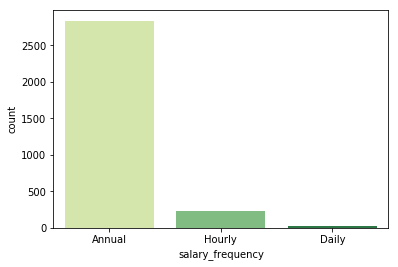

In [13]:
sns.countplot(x='salary_frequency', data=df, palette="YlGn")

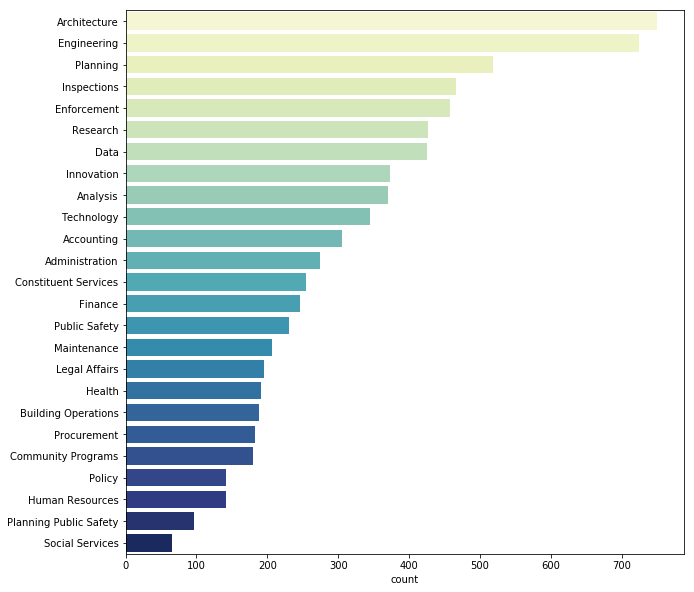

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.countplot(y=key_categories, order=popular_categories.index, palette='YlGnBu')

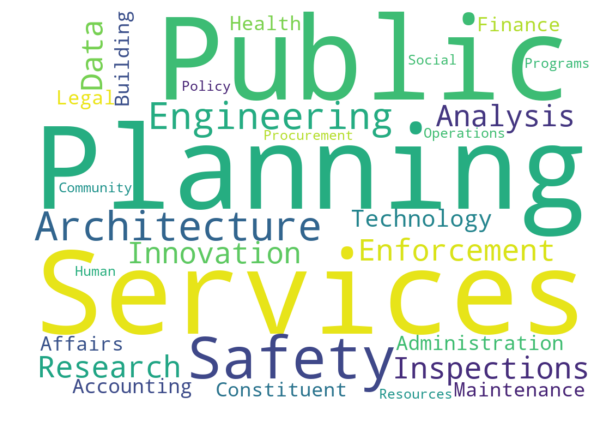

In [28]:
def plot_wordcloud(text):
    wordcloud = WordCloud(background_color='white',
                     width=1024, height=720).generate(text)
    plt.clf()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()
    
    
from wordcloud import WordCloud
plt.figure(figsize=(10,8))
plot_wordcloud(' '.join(popular_categories.index.tolist()))

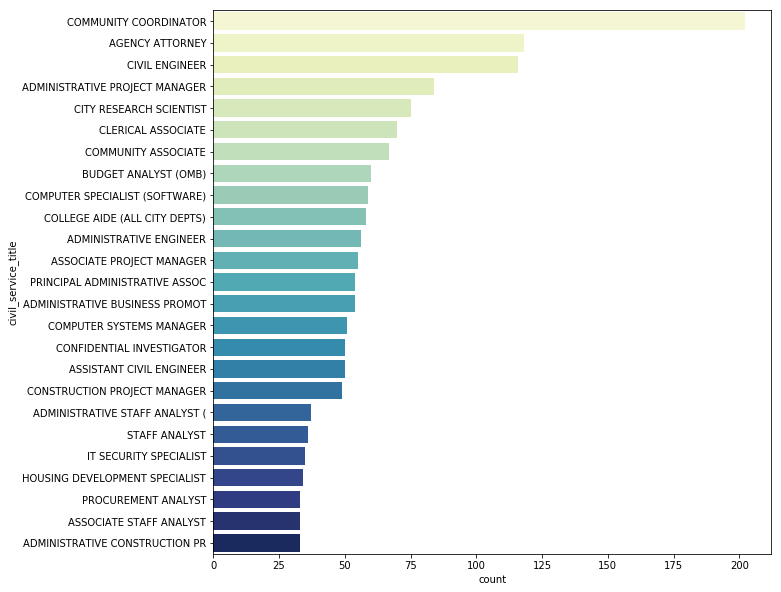

In [24]:
plt.figure(figsize=(10,10))
titles_freq = nyc_jobs_df.civil_service_title.value_counts()
popular_titles = titles_freq.iloc[:25]
sns.countplot(y="civil_service_title", data=nyc_jobs_df, order=popular_titles.index, palette='YlGnBu')

In [25]:
titles_freq

COMMUNITY COORDINATOR             202
AGENCY ATTORNEY                   118
CIVIL ENGINEER                    116
ADMINISTRATIVE PROJECT MANAGER     84
CITY RESEARCH SCIENTIST            75
CLERICAL ASSOCIATE                 70
COMMUNITY ASSOCIATE                67
BUDGET ANALYST (OMB)               60
COMPUTER SPECIALIST (SOFTWARE)     59
COLLEGE AIDE (ALL CITY DEPTS)      58
ADMINISTRATIVE ENGINEER            56
ASSOCIATE PROJECT MANAGER          55
PRINCIPAL ADMINISTRATIVE ASSOC     54
ADMINISTRATIVE BUSINESS PROMOT     54
COMPUTER SYSTEMS MANAGER           51
CONFIDENTIAL INVESTIGATOR          50
ASSISTANT CIVIL ENGINEER           50
CONSTRUCTION PROJECT MANAGER       49
ADMINISTRATIVE STAFF ANALYST (     37
STAFF ANALYST                      36
IT SECURITY SPECIALIST             35
HOUSING DEVELOPMENT SPECIALIST     34
PROCUREMENT ANALYST                33
ASSOCIATE STAFF ANALYST            33
ADMINISTRATIVE CONSTRUCTION PR     33
EXECUTIVE AGENCY COUNSEL           33
ENGINEERING 

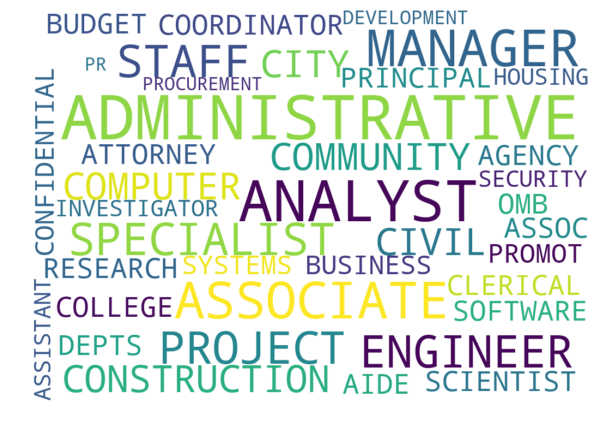

In [35]:
plt.figure(figsize=(10,8))
plot_wordcloud(' '.join(popular_titles.index.tolist()))

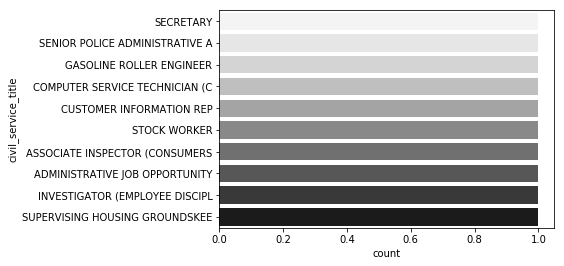

In [38]:
least_popular = titles_freq.iloc[-10:]
sns.countplot(y="civil_service_title", data=nyc_jobs_df, order=least_popular.index, palette="Greys")

In [41]:
titles_freq[-10:]

SECRETARY                         1
SENIOR POLICE ADMINISTRATIVE A    1
GASOLINE ROLLER ENGINEER          1
COMPUTER SERVICE TECHNICIAN (C    1
CUSTOMER INFORMATION REP          1
STOCK WORKER                      1
ASSOCIATE INSPECTOR (CONSUMERS    1
ADMINISTRATIVE JOB OPPORTUNITY    1
INVESTIGATOR (EMPLOYEE DISCIPL    1
SUPERVISING HOUSING GROUNDSKEE    1
Name: civil_service_title, dtype: int64